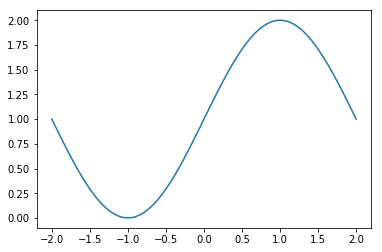

In [116]:
import matplotlib.pyplot as plt
from math import sin
xpts = np.linspace(-2, 2, 70)

test = lambda x: 1 + sin( (3.1416/2)*np.array(x)  )
l = [test(x) for x in xpts]
plt.plot(xpts, l)
plt.show()

In [124]:
x_train = np.array(xpts, ndmin=2)
y_train = np.array(l, ndmin=2)

In [130]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=0)

In [179]:
import numpy as np

class mlp:
    def __init__(self,inputs,targets,nhidden,outtype='linear'):
        # Network size
        self.nin = np.shape(inputs)[1]
        self.nout = np.shape(targets)[1]
        self.ndata = np.shape(inputs)[0]
        self.nhidden = nhidden

        self.outtype = outtype
        # Initialise network
        self.weights1 = (np.random.rand(self.nin+1,self.nhidden)-0.5)*2/np.sqrt(self.nin)
        self.weights2 = (np.random.rand(self.nhidden+1,self.nout)-0.5)*2/np.sqrt(self.nhidden)
        print(self.nin, self.nhidden,self.nout)
        print(self.weights1,'\n',self.weights2 )
        
    def train(self,inputs,targets,eta,niterations):
        # Add the inputs that match the bias node
        inputs = np.concatenate((inputs,-np.ones((self.ndata,1))),axis=1)

    
        updatew1 = np.zeros((np.shape(self.weights1)))
        updatew2 = np.zeros((np.shape(self.weights2)))
            
        for n in range(niterations):
    
            self.outputs = self.mlpfwd(inputs)

            error = 0.5*np.sum((self.outputs-targets)**2)

            print("Iteration: ",n, " Error: ",error)    

            # Different types of output neurons
            if self.outtype == 'linear':
                deltao = (self.outputs-targets)/self.ndata

            
            deltah = self.hidden*(1.0-self.hidden)*(np.dot(deltao,np.transpose(self.weights2)))
                      
            updatew1 = eta*(np.dot(np.transpose(inputs),deltah[:,:-1])) +updatew1
            updatew2 = eta*(np.dot(np.transpose(self.hidden),deltao)) + updatew2
            self.weights1 -= updatew1
            self.weights2 -= updatew2

    def mlpfwd(self,inputs):


        self.hidden = np.dot(inputs,self.weights1);
        self.hidden = 1.0/(1.0+np.exp(self.hidden))
        self.hidden = np.concatenate((self.hidden,-np.ones((np.shape(inputs)[0],1))),axis=1)

        outputs = np.dot(self.hidden,self.weights2);

        # Different types of output neurons
        if self.outtype == 'linear':
            return outputs

        

m = mlp(x_train.T,y_train.T,1)
m.train(x_train.T, y_train.T, 0.01,20)

1 1 1
[[-0.70476727]
 [ 0.02031591]] 
 [[-0.31522   ]
 [-0.09543331]]
Iteration:  0  Error:  59.25724089345954
Iteration:  1  Error:  58.17996876799058
Iteration:  2  Error:  56.078417399985604
Iteration:  3  Error:  53.056082094804076
Iteration:  4  Error:  49.262072454749514
Iteration:  5  Error:  44.88401399270803
Iteration:  6  Error:  40.13902372422522
Iteration:  7  Error:  35.26314098102702
Iteration:  8  Error:  30.499686851836675
Iteration:  9  Error:  26.08710528233966
Iteration:  10  Error:  22.246896577835535
Iteration:  11  Error:  19.17228036912596
Iteration:  12  Error:  17.01821228675163
Iteration:  13  Error:  15.893322373823882
Iteration:  14  Error:  15.854244091684894
Iteration:  15  Error:  16.902666238595128
Iteration:  16  Error:  18.985276542526567
Iteration:  17  Error:  21.996588906446924
Iteration:  18  Error:  25.78447169824537
Iteration:  19  Error:  30.158037035842373
